In [44]:
#Alejandra Ocampo, Valentina Malagon

In [45]:
#Entrega 1 domingo 30 
#Entrega 2 lunes 8 

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from geopy.distance import distance
!pip install dataprep
from dataprep.eda import create_report
from google.colab import files 
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
festivos=pd.read_csv("https://raw.githubusercontent.com/mariangelmantilla2008/Base-de-datos-taller-final-/main/festivos.csv")
test_clima=pd.read_csv("https://raw.githubusercontent.com/mariangelmantilla2008/Base-de-datos-taller-final-/main/test_clima.csv")
train_clima=pd.read_csv("https://raw.githubusercontent.com/mariangelmantilla2008/Base-de-datos-taller-final-/main/train_clima.csv")
test_info_geo=pd.read_csv("https://raw.githubusercontent.com/mariangelmantilla2008/Base-de-datos-taller-final-/main/test_info_geo.csv")
test_principal=pd.read_csv("https://raw.githubusercontent.com/mariangelmantilla2008/Base-de-datos-taller-final-/main/test_principal.csv")
train_principal=pd.read_csv("https://raw.githubusercontent.com/mariangelmantilla2008/Base-de-datos-taller-final-/main/train_principal.csv")
train_info_geo=pd.read_csv("https://raw.githubusercontent.com/mariangelmantilla2008/Base-de-datos-taller-final-/main/train_info_geo.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Revision de los train

In [47]:
train_principal.shape

(7220, 5)

In [48]:
train_principal.head()

,id,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega
0,1,2016/04/14 20:53:00,modelo_1,3,448
1,2,2016/05/30 23:12:00,modelo_2,1,784
2,3,2016/03/03 11:54:00,modelo_2,1,844
3,4,2016/05/02 12:34:00,modelo_1,1,2076
4,5,2016/03/02 15:53:00,modelo_1,1,1289


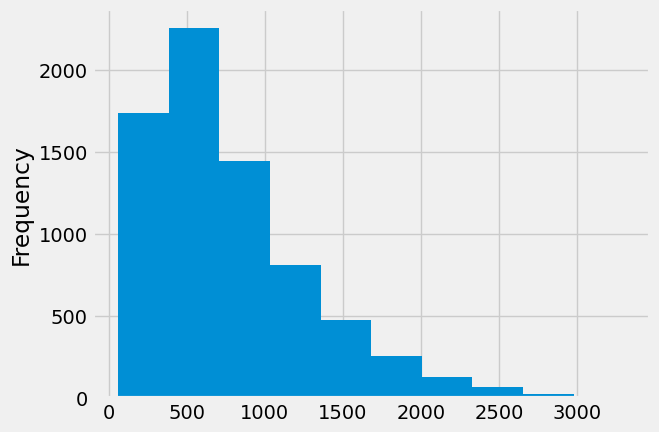

In [49]:
#Distribucion de la variable objetivo
train_principal['tiempo_entrega'].astype(int).plot.hist();

En primer lugar podemos visualizar que la variable objetivo tiene una gran cantidad de datos en 0. Ahora bien la distribucion de esta variable objetivo tiene los datos concentrados hacia un costado presentando curtosis y una distibucion parecida a la Log-normal . 

In [50]:
#Unimos los dos dataframes para trabajarlos al mismo tiempo
train_principal['dataset'] = 'train'
test_principal['dataset'] = 'test'
# El ID único de cada cliente, por lo que lo vamos a setear como índice de cada dataframe
train_principal.set_index('id', inplace=True)
test_principal.set_index('id', inplace=True)
# Unimos los dos df con append
train_test_principal = train_principal.append(test_principal) #Pegar algo por debajo 

train_test_principal.tail(1)

<ipython-input-50-0aa4f9ca7655>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_principal = train_principal.append(test_principal) #Pegar algo por debajo


,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset
id,,,,,
7578,2016/03/19 12:53:00,modelo_1,1,NaN,test


In [51]:
#Unimos los dos dataframes para trabajarlos al mismo tiempo
train_clima['dataset'] = 'train'
test_clima['dataset'] = 'test'
# El ID único de cada cliente, por lo que lo vamos a setear como índice de cada dataframe
train_clima.set_index('id', inplace=True)
test_clima.set_index('id', inplace=True)
# Unimos los dos df con append
train_test_clima = train_clima.append(test_clima) #Pegar algo por debajo 

train_test_clima.tail(1)

<ipython-input-51-bde2c203442e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_clima = train_clima.append(test_clima) #Pegar algo por debajo


,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,precipitacion,niebla,lluvia,nieve,dataset
id,,,,,,,,,,,,,
4403,bruma,11.7,8.9,83.0,NaN,0,9.7,29.7,0.3,No,No,No,test


In [52]:
#Unimos los dos dataframes para trabajarlos al mismo tiempo
train_info_geo['dataset'] = 'train'
test_info_geo['dataset'] = 'test'
# El ID único de cada cliente, por lo que lo vamos a setear como índice de cada dataframe
train_info_geo.set_index('id', inplace=True)
test_info_geo.set_index('id', inplace=True)
# Unimos los dos df con append
train_test_info_geo = train_info_geo.append(test_info_geo) #Pegar algo por debajo 

train_test_info_geo.tail(1)

<ipython-input-52-edb8de1217ff>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_info_geo = train_info_geo.append(test_info_geo) #Pegar algo por debajo


,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset
id,,,,,,
1147,Nueva York,-73.986427,40.767189,-73.983398,40.760872,test


#Unimos todos los Dataframes para trabajarlos simultaneamente

In [53]:
data1 = pd.merge(train_test_principal, train_test_clima, on='id')

In [54]:
data = pd.merge(data1, train_test_info_geo, on='id')
data.head()

,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,precipitacion,niebla,lluvia,nieve,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset
id,,,,,,,,,,,,,,,,,,,,,,,,
1,2016/04/14 20:53:00,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,NaN,No,No,No,train,Nueva York,-73.950912,40.825974,-73.944740,40.814163,train
2,2016/05/30 23:12:00,modelo_2,1,784.0,train,parcialmente nublado,22.8,18.9,79.0,9.3,0,16.1,30.0,NaN,No,No,No,train,Nueva York,-73.985680,40.760487,-73.942482,40.786232,train
3,2016/03/03 11:54:00,modelo_2,1,844.0,train,despejado,0.0,-15.6,31.0,9.3,250,16.1,30.2,NaN,No,No,No,train,Nueva York,-73.985420,40.758389,-74.007294,40.726639,train
4,2016/05/02 12:34:00,modelo_1,1,2076.0,train,nublado,0.6,-1.7,85.0,13.0,300,4.0,30.1,NaN,No,No,No,train,Nueva York,-73.870964,40.773792,-73.989090,40.746052,train
5,2016/03/02 15:53:00,modelo_1,1,1289.0,train,lluvia,13.9,12.2,89.0,11.1,170,1.6,30.0,5.1,No,Si,No,train,Nueva York,-73.979012,40.745266,-73.979240,40.772480,train


<ipython-input-55-9e1aadce3b3f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


(14.5, -0.5)

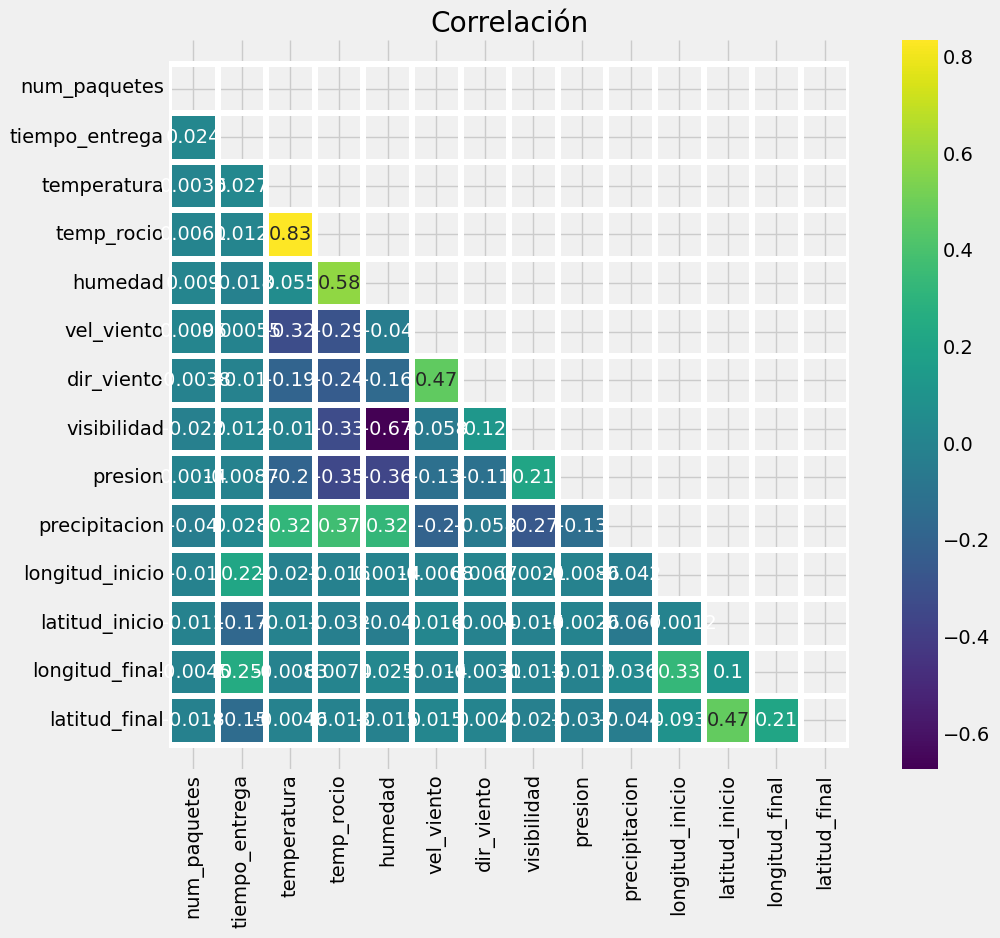

In [55]:
correlation = data.corr()
f,ax =plt.subplots(figsize =(12,9))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, mask=mask , ax=ax, 
            linewidths = 4, cmap = 'viridis', square=True).set_title("Correlación")
bottom,top = ax.get_ylim()
ax.set_ylim (bottom + 0.5 , top - 0.5)

En este grafico se ven las correlaciones entre las variables. Destacandose la relacion fuertemente positiva entre la temperatura de rocio y temperatura. Humedad y temperatura de rocio. Y la relacion fuertemente negativa entre Visibilidad y Humedad 

In [56]:
#Correlacion en todo el dataframne de train 
correlations = data.corr()["tiempo_entrega"].sort_values()
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 temperatura        0.027070
precipitacion      0.027524
longitud_inicio    0.215718
longitud_final     0.247205
tiempo_entrega     1.000000
Name: tiempo_entrega, dtype: float64

Most Negative Correlations:
 latitud_inicio   -0.172163
latitud_final    -0.148103
humedad          -0.017518
dir_viento       -0.010254
presion          -0.008691
Name: tiempo_entrega, dtype: float64


<ipython-input-56-83907f04a185>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()["tiempo_entrega"].sort_values()


# Insight#1

En el codigo estamos buscando las variables que mas expliquen la variable objetivo. Las que mas la explican de forma directa y positiva son la temperatura, precipitacion y las cordenadas longitud. Por lo que estas variables seran una prioridad a la hora de la transformacion y creacion de variables nuevas. Por otro lado, de forma negativa las cordenadas de latitud es la que mas impacto real tiene.

In [81]:
#create_report(data)

# Insight#2

Dentro de este reporte se pueden ver varias cosas interesantes en cuanto a la distibucion de todas las variables, su relacion y el tipo de datos que contienen. Lo mas interesante es que del dataset la variable tiempo_entrega tiene el 15% de datos faltantes, vel_viento el 7,7%, visibilidad el 2,7% presion 2,66% y precipitacion un 84.92% Por lo que toca tener cuidado con esa ultima especificamente. Y la variable ciudad solo tiene una categoria 

# Modificacion  de variables en el Dataset principal

In [58]:
#Contamos los datos en lluvia 
data['lluvia'].value_counts()

No    7784
Si     710
Name: lluvia, dtype: int64

In [59]:
#Contamos los datos en precipitacion
data['precipitacion'].value_counts()

0.0     339
0.3     283
0.5     148
0.8      95
1.0      84
1.3      49
1.5      38
1.8      35
2.3      32
2.0      32
3.0      30
2.5      20
2.8      13
6.1      10
3.6       9
6.6       8
10.4      7
3.3       6
5.1       5
3.8       4
6.9       4
5.8       4
7.4       3
4.1       2
9.4       2
11.7      2
9.1       2
4.8       2
14.7      2
12.7      2
4.6       2
10.2      2
18.5      2
8.9       1
5.6       1
5.3       1
Name: precipitacion, dtype: int64

In [60]:
#Se hacen rangos para dividir precipitacion y se le dan categorias para precisar el estado del clima 
bins = [0, 2, 6.5, 16,20]
labels = ["debil",'ligera', 'moderada',"fuerte"]
data['intensidad'] = pd.cut(data['precipitacion'], bins=bins, labels=labels)
data = data.drop('precipitacion', axis=1)
data.head(5)


,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,niebla,lluvia,nieve,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset,intensidad
id,,,,,,,,,,,,,,,,,,,,,,,,
1,2016/04/14 20:53:00,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,No,No,No,train,Nueva York,-73.950912,40.825974,-73.944740,40.814163,train,NaN
2,2016/05/30 23:12:00,modelo_2,1,784.0,train,parcialmente nublado,22.8,18.9,79.0,9.3,0,16.1,30.0,No,No,No,train,Nueva York,-73.985680,40.760487,-73.942482,40.786232,train,NaN
3,2016/03/03 11:54:00,modelo_2,1,844.0,train,despejado,0.0,-15.6,31.0,9.3,250,16.1,30.2,No,No,No,train,Nueva York,-73.985420,40.758389,-74.007294,40.726639,train,NaN
4,2016/05/02 12:34:00,modelo_1,1,2076.0,train,nublado,0.6,-1.7,85.0,13.0,300,4.0,30.1,No,No,No,train,Nueva York,-73.870964,40.773792,-73.989090,40.746052,train,NaN
5,2016/03/02 15:53:00,modelo_1,1,1289.0,train,lluvia,13.9,12.2,89.0,11.1,170,1.6,30.0,No,Si,No,train,Nueva York,-73.979012,40.745266,-73.979240,40.772480,train,ligera


In [61]:
#Con la variable lluvia se hace este codigo para que cuando el dato sea positiva (si) la variable sea categorizada por su precipitacion
data['lluvia1'] = data.apply(lambda row: row['intensidad'] if row['lluvia'] == 'Si' else 'No', axis=1)
data = data.drop('intensidad', axis=1)
data = data.drop('lluvia', axis=1)
data.head(5)

,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,niebla,nieve,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset,lluvia1
id,,,,,,,,,,,,,,,,,,,,,,,
1,2016/04/14 20:53:00,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,No,No,train,Nueva York,-73.950912,40.825974,-73.944740,40.814163,train,No
2,2016/05/30 23:12:00,modelo_2,1,784.0,train,parcialmente nublado,22.8,18.9,79.0,9.3,0,16.1,30.0,No,No,train,Nueva York,-73.985680,40.760487,-73.942482,40.786232,train,No
3,2016/03/03 11:54:00,modelo_2,1,844.0,train,despejado,0.0,-15.6,31.0,9.3,250,16.1,30.2,No,No,train,Nueva York,-73.985420,40.758389,-74.007294,40.726639,train,No
4,2016/05/02 12:34:00,modelo_1,1,2076.0,train,nublado,0.6,-1.7,85.0,13.0,300,4.0,30.1,No,No,train,Nueva York,-73.870964,40.773792,-73.989090,40.746052,train,No
5,2016/03/02 15:53:00,modelo_1,1,1289.0,train,lluvia,13.9,12.2,89.0,11.1,170,1.6,30.0,No,No,train,Nueva York,-73.979012,40.745266,-73.979240,40.772480,train,ligera


In [62]:
#Se crea una funcion para que si la lluvia es moderada o fuerte el clima sea categoria positiva 
def lluvia(row):
    if row['lluvia1'] == 'moderada' or row['lluvia1'] == 'fuerte':
        return 'Si'
    else:
        return 'No'
    
data['lluvia'] = data.apply(lluvia, axis=1)  
data = data.drop('lluvia1', axis=1)
data.head(1)  

,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,niebla,nieve,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset,lluvia
id,,,,,,,,,,,,,,,,,,,,,,,
1,2016/04/14 20:53:00,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,No,No,train,Nueva York,-73.950912,40.825974,-73.94474,40.814163,train,No


In [63]:
#Se hace una condicion para que lluvia, nieve y niebla sean excluidas de la categoria Bueno en clima
condiciones = [
    (data['lluvia'] == 'Si'),
    (data['nieve'] == 'Si'),
    (data['niebla'] == 'Si')
]

opciones = ["lluvia",'nieve', 'niebla']
data['clima'] = np.select(condiciones, opciones, default='Bueno')

data = data.drop('lluvia', axis=1)
data = data.drop('nieve', axis=1)
data = data.drop('niebla', axis=1)

data.head(5)

,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset,clima
id,,,,,,,,,,,,,,,,,,,,,
1,2016/04/14 20:53:00,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,train,Nueva York,-73.950912,40.825974,-73.944740,40.814163,train,Bueno
2,2016/05/30 23:12:00,modelo_2,1,784.0,train,parcialmente nublado,22.8,18.9,79.0,9.3,0,16.1,30.0,train,Nueva York,-73.985680,40.760487,-73.942482,40.786232,train,Bueno
3,2016/03/03 11:54:00,modelo_2,1,844.0,train,despejado,0.0,-15.6,31.0,9.3,250,16.1,30.2,train,Nueva York,-73.985420,40.758389,-74.007294,40.726639,train,Bueno
4,2016/05/02 12:34:00,modelo_1,1,2076.0,train,nublado,0.6,-1.7,85.0,13.0,300,4.0,30.1,train,Nueva York,-73.870964,40.773792,-73.989090,40.746052,train,Bueno
5,2016/03/02 15:53:00,modelo_1,1,1289.0,train,lluvia,13.9,12.2,89.0,11.1,170,1.6,30.0,train,Nueva York,-73.979012,40.745266,-73.979240,40.772480,train,Bueno


In [64]:
#Para trabajar y modificar las variables de longitud y latitud
latitud_inicio = data['latitud_inicio']
longitud_inicio = data['longitud_inicio']
latitud_final = data['latitud_final']
longitud_final = data['longitud_final']

# Calcular la distancia entre los dos puntos 
distances = []
for lat1, lon1, lat2, lon2 in zip(latitud_inicio, longitud_inicio, latitud_final, longitud_final):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    dist = distance(point1, point2).miles
    distances.append(dist)

# Agregar la nueva variable a data 
data['distance'] = distances
data.head(1)

,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset,clima,distance
id,,,,,,,,,,,,,,,,,,,,,,
1,2016/04/14 20:53:00,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,train,Nueva York,-73.950912,40.825974,-73.94474,40.814163,train,Bueno,0.876832


In [65]:
#Para la variable de inicio_trayecto se va a categorizar el dia de la semana en la que se da el suceso 
data['inicio_trayecto'] = pd.to_datetime(data['inicio_trayecto'])
data['dia'] = data['inicio_trayecto'].dt.day_name()
data['dia'] = pd.Categorical(data['dia'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
data.head(1)

,inicio_trayecto,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset,clima,distance,dia
id,,,,,,,,,,,,,,,,,,,,,,,
1,2016-04-14 20:53:00,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,train,Nueva York,-73.950912,40.825974,-73.94474,40.814163,train,Bueno,0.876832,Thursday


In [66]:
from pandas.core.apply import DataError
data["inicio_trayecto"] = pd.to_datetime(data['inicio_trayecto'], format='%Y-%m-%d %H:%M:%S')
data['hora'] = data['inicio_trayecto'].dt.hour
data['minuto'] = data['inicio_trayecto'].dt.minute
data['segundo'] = data['inicio_trayecto'].dt.second
data = data.drop('inicio_trayecto', axis=1)
data.head(1)

,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,dataset_y,ciudad,longitud_inicio,latitud_inicio,longitud_final,latitud_final,dataset,clima,distance,dia,hora,minuto,segundo
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,modelo_1,3,448.0,train,despejado,8.9,0.0,54.0,16.7,170,16.1,30.4,train,Nueva York,-73.950912,40.825974,-73.94474,40.814163,train,Bueno,0.876832,Thursday,20,53,0


#Modificacion de Outliers

<Axes: ylabel='visibilidad'>

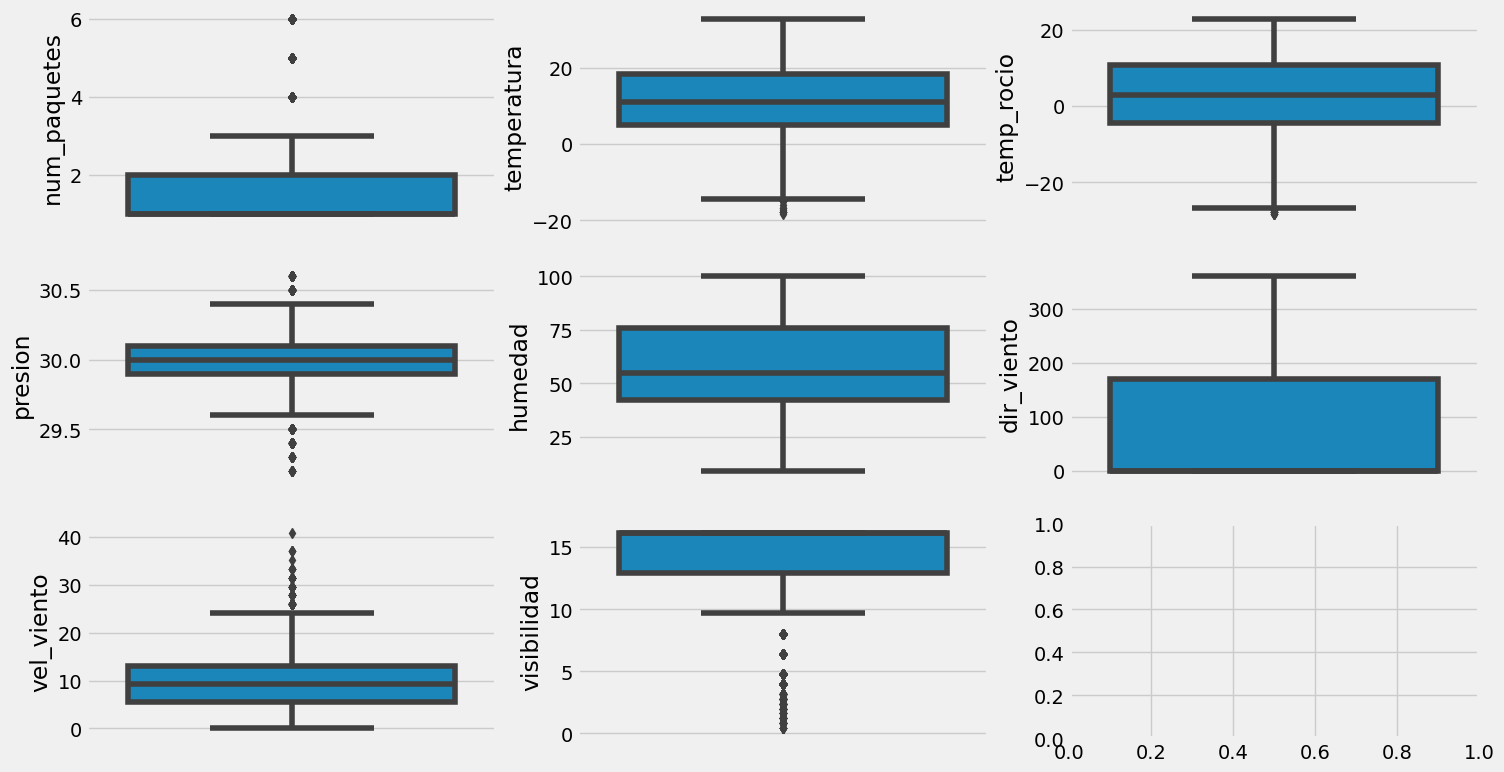

In [67]:
#Para identificar outliers
fig,ax = plt.subplots(3,3,figsize=(16,9))
sns.boxplot(data=data,y='num_paquetes',ax=ax[0,0])
sns.boxplot(data=data,y='temperatura',ax=ax[0,1])
sns.boxplot(data=data,y='temp_rocio',ax=ax[0,2])
sns.boxplot(data=data,y='humedad',ax=ax[1,1])
sns.boxplot(data=data,y='dir_viento',ax=ax[1,2])
sns.boxplot(data=data,y='presion',ax=ax[1,0])
sns.boxplot(data=data,y='vel_viento',ax=ax[2,0])
sns.boxplot(data=data,y='visibilidad',ax=ax[2,1])

In [68]:
#En este caso vamos a imputar la mediana a las columnas que tienen outliers
columnas_outliers = ["num_paquetes","presion","dir_viento","vel_viento","visibilidad"]

for columna in columnas_outliers:
    q1 = data[columna].quantile(0.25)
    q3 = data[columna].quantile(0.75)
    iqr = q3-q1 
    limite_arriba = q3 + 1.5*iqr
    limite_abajo = q1 - 1.5*iqr
    mediana = data[columna].median()
    media = data[columna].mean()
    data.loc[data[columna].abs() > limite_arriba,columna] = np.nan
    data[columna].fillna(mediana, inplace=True)
    data.loc[data[columna].abs() < limite_abajo,columna] = np.nan
    data[columna].fillna(mediana, inplace=True) 

<Axes: ylabel='visibilidad'>

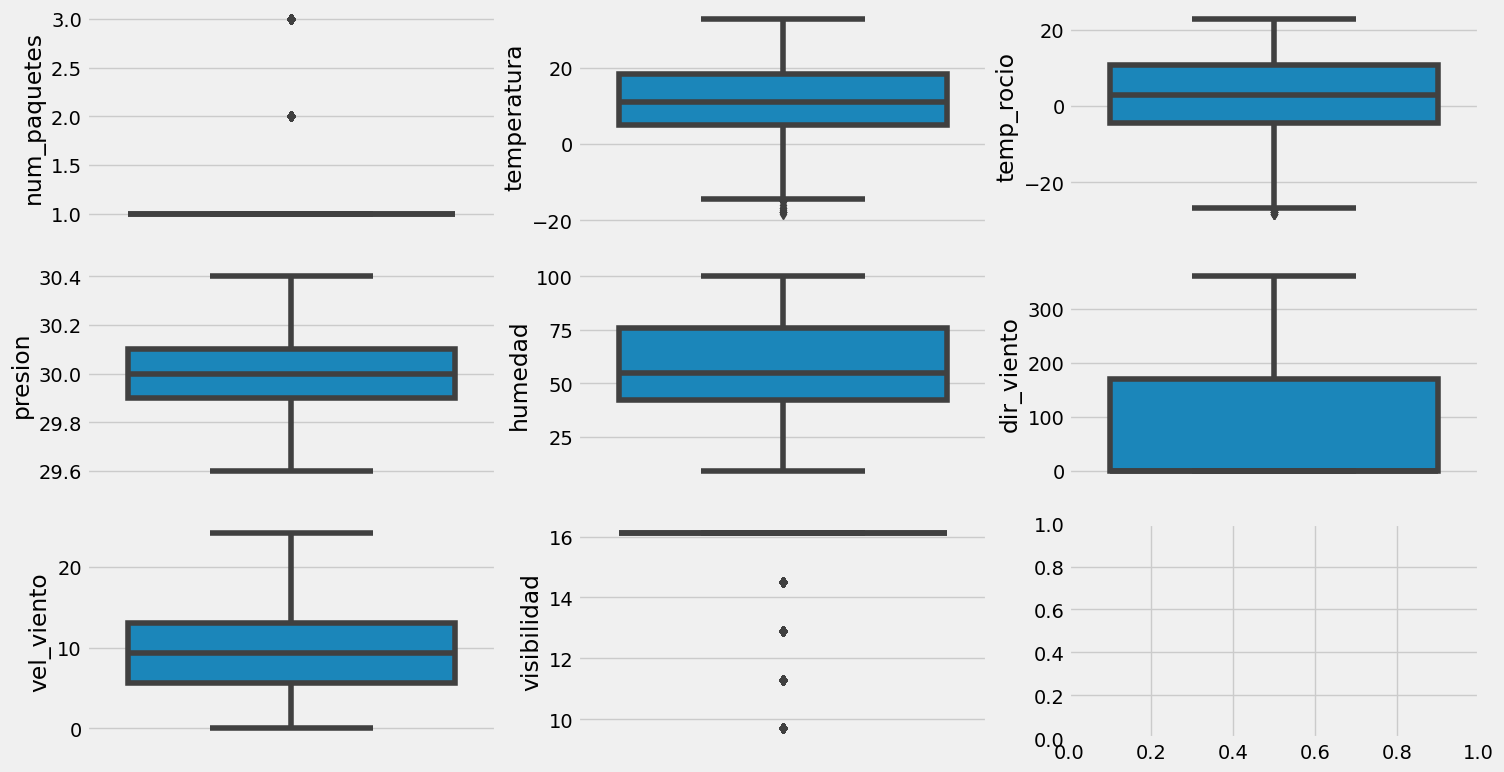

In [69]:
fig,ax = plt.subplots(3,3,figsize=(16,9))
sns.boxplot(data=data,y='num_paquetes',ax=ax[0,0])
sns.boxplot(data=data,y='temperatura',ax=ax[0,1])
sns.boxplot(data=data,y='temp_rocio',ax=ax[0,2])
sns.boxplot(data=data,y='humedad',ax=ax[1,1])
sns.boxplot(data=data,y='dir_viento',ax=ax[1,2])
sns.boxplot(data=data,y='presion',ax=ax[1,0])
sns.boxplot(data=data,y='vel_viento',ax=ax[2,0])
sns.boxplot(data=data,y='visibilidad',ax=ax[2,1])

# Valores nulos

In [70]:
#Buscar los valores cero dentro del Dataset
data.isna().sum()

modelo_camioneta        0
num_paquetes            0
tiempo_entrega       1274
dataset_x               0
condiciones_clima       0
temperatura             2
temp_rocio              2
humedad                 2
vel_viento              0
dir_viento              0
visibilidad             0
presion                 0
dataset_y               0
ciudad                  0
longitud_inicio         0
latitud_inicio          0
longitud_final          0
latitud_final           0
dataset                 0
clima                   0
distance                0
dia                     0
hora                    0
minuto                  0
segundo                 0
dtype: int64

<Axes: xlabel='Count', ylabel='presion'>

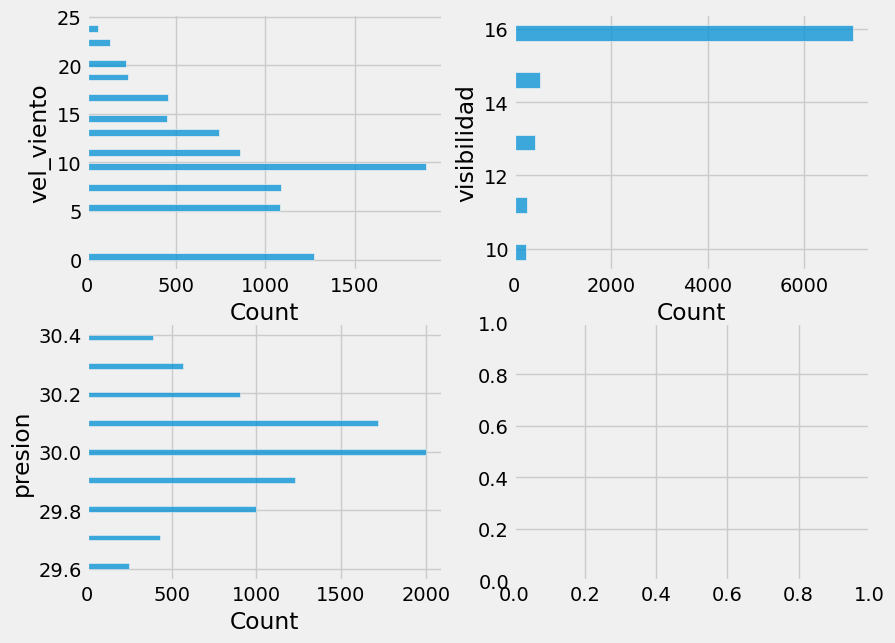

In [71]:
#Para ver la distribucion de las variables y poderles modificar apropiadamente los valores 0. Para temperatura, humedad y temp_rocio se les 
#remplazaran los valores cero con la mediana 
fig,ax = plt.subplots(2,2,figsize=(9,7))
sns.histplot(data=data,y='vel_viento',ax=ax[0,0])
sns.histplot(data=data,y='visibilidad',ax=ax[0,1])
sns.histplot(data=data,y='presion',ax=ax[1,0])

In [72]:
data.loc[data.temperatura.isna(),"temperatura"]=data.loc[~data.temperatura.isna(),"temperatura"].median()
data.loc[data.temp_rocio.isna(),"temp_rocio"]=data.loc[~data.temp_rocio.isna(),"temp_rocio"].median()
data.loc[data.humedad.isna(),"humedad"]=data.loc[~data.humedad.isna(),"humedad"].median()
data.isna().sum()

modelo_camioneta        0
num_paquetes            0
tiempo_entrega       1274
dataset_x               0
condiciones_clima       0
temperatura             0
temp_rocio              0
humedad                 0
vel_viento              0
dir_viento              0
visibilidad             0
presion                 0
dataset_y               0
ciudad                  0
longitud_inicio         0
latitud_inicio          0
longitud_final          0
latitud_final           0
dataset                 0
clima                   0
distance                0
dia                     0
hora                    0
minuto                  0
segundo                 0
dtype: int64

# Transformacion de variables categoricas

In [73]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cramersv_dataframe_target(dataframe,nameTarget):
    df = pd.DataFrame(columns=['v_cramer'],index=dataframe.columns.tolist())
    for col in dataframe.columns.tolist():
        print('V de Cramer para {}: '.format(col) + format(round(cramers_v(dataframe[col],dataframe[nameTarget]),3)))
        df.loc[col,'v_cramer'] = round(cramers_v(dataframe[col],dataframe[nameTarget]),3)
    return df

In [74]:
def cramersv_dataframe(dataframe):
    df = pd.DataFrame(columns=dataframe.columns.tolist(),index=dataframe.columns.tolist())
    for index in dataframe.columns.tolist():
        for columna in dataframe.columns.tolist():
            df.loc[index,columna] = round(cramers_v(dataframe[index],dataframe[columna]),3)
    return df
        
lista_var_cat = []
for columna in data.columns:
    if data[columna].dtypes=='O':
        lista_var_cat.append(columna)

In [75]:
cramer_df = cramersv_dataframe(data.loc[:,lista_var_cat])
cramer_df

<ipython-input-73-74d58ecd1976>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-73-74d58ecd1976>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-73-74d58ecd1976>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-73-74d58ecd1976>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-73-74d58ecd1976>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-73-74d58ecd1976>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-73-74d58ecd1976>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt

,modelo_camioneta,dataset_x,condiciones_clima,dataset_y,ciudad,dataset,clima
modelo_camioneta,1.0,0.0,0.025,0.0,NaN,0.0,0.0
dataset_x,0.0,1.0,0.0,1.0,NaN,1.0,0.0
condiciones_clima,0.025,0.0,1.0,0.0,NaN,0.0,0.649
dataset_y,0.0,1.0,0.0,1.0,NaN,1.0,0.0
ciudad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,0.0,1.0,0.0,1.0,NaN,1.0,0.0
clima,0.0,0.0,0.649,0.0,NaN,0.0,1.0


# Insight #3

Cramer nos permite ver la correlacion entre variables categoricas. Y en este caso se puede ver una fuerte relacion entre clima y condiciones_clima, lo cual es predecible. Y tambien se ve una relacion entre condiciones_clima y el modelo_camioneta

In [76]:
data['ciudad'].value_counts()

Nueva York    8494
Name: ciudad, dtype: int64

In [80]:
#Ya que en Ciudad todos los datos son Nueva York se elimina la variable. Las variables de longitud y latitud tambien se van  a quitar porque 
#ya han sido transformadas. Y condiciones_clima tambien porque ya ha sido transformada 
col_eliminar = ["ciudad","longitud_inicio","latitud_inicio","longitud_final","latitud_inicio","condiciones_clima"]
data= data.loc[:,~data.columns.isin(col_eliminar)]
data.head(3)

,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,dataset_y,latitud_final,dataset,clima,distance,dia,hora,minuto,segundo
id,,,,,,,,,,,,,,,,,,,,
1,0,3.0,448.0,train,8.9,0.0,54.0,16.7,170.0,16.1,30.4,train,40.814163,train,Bueno,0.876832,4,20,53,0
2,1,1.0,784.0,train,22.8,18.9,79.0,9.3,0.0,16.1,30.0,train,40.786232,train,Bueno,2.879407,1,23,12,0
3,1,1.0,844.0,train,0.0,-15.6,31.0,9.3,250.0,16.1,30.2,train,40.726639,train,Bueno,2.473356,4,11,54,0


In [78]:
#Para estas variables categoricas como no tienen jerarquia se transforman en numeros
le = LabelEncoder()
data['modelo_camioneta'] = le.fit_transform(data['modelo_camioneta'])
data['dia'] = le.fit_transform(data['dia'])
data.head(1)

,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,dataset_y,latitud_final,dataset,clima,distance,dia,hora,minuto,segundo
id,,,,,,,,,,,,,,,,,,,,,
1,0,3.0,448.0,train,despejado,8.9,0.0,54.0,16.7,170.0,16.1,30.4,train,40.814163,train,Bueno,0.876832,4,20,53,0


In [79]:
#Esta variable categorica si tiene jerarquia 
columnas_encodear = ["clima"]
data_ohe = pd.get_dummies(data, columns=columnas_encodear, prefix='OHE')
data_ohe.head(2)

,modelo_camioneta,num_paquetes,tiempo_entrega,dataset_x,condiciones_clima,temperatura,temp_rocio,humedad,vel_viento,dir_viento,visibilidad,presion,dataset_y,latitud_final,dataset,distance,dia,hora,minuto,segundo,OHE_Bueno,OHE_lluvia,OHE_niebla,OHE_nieve
id,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3.0,448.0,train,despejado,8.9,0.0,54.0,16.7,170.0,16.1,30.4,train,40.814163,train,0.876832,4,20,53,0,1,0,0,0
2,1,1.0,784.0,train,parcialmente nublado,22.8,18.9,79.0,9.3,0.0,16.1,30.0,train,40.786232,train,2.879407,1,23,12,0,1,0,0,0
